#Image Features and Homographies

In [48]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

#Problem #1
Find the Hough transform (using the normal equation of a line) for the lines enclosing an object
with vertices A=(2,0), B=(2,2) and C=(0,2). Sketch the modified object enclosed by lines replacing
(rho,theta) of the given object lines with (rho*rho,theta + 90). Calculate the area of the modified
object.

In [49]:
# Find all normal lines from point pairs
def points2lines(points):
    lines = np.zeros([1,3])
    r,c = points.shape
    while(r>1):
        for i in np.arange(1,r):
            line = np.cross(points[i,:], points[0,:])
            lines = np.vstack([lines, line])
        points = points[1:,:]
        r,c = points.shape
    lines = lines[1:,:]
    return lines

# Convert linear eqn to rho-theta
def linear2hough(lines):
    rhotheta = np.zeros([lines.shape[0],2])
    for i in range(lines.shape[0]):
        slope = -lines[i,0]/lines[i,1]
        theta = math.atan(-1/slope)
        if theta !=(0):
            b = -lines[i,2]/lines[i,1]
            x = -b/(slope+1/slope)
            y = slope*x + b
            rho = x*np.cos(theta) + y*np.sin(theta)
        else:
            rho = -lines[i,2]/lines[i,0]
        rhotheta[i,:] = [rho, theta]
    return rhotheta

# Plot a list of vertices as lines
def verts2lines(vertices):
    for i in range(vertices.shape[0]):
        if i == vertices.shape[0]-1:
            x = [vertices[i,0], vertices[0,0]]
            y = [vertices[i,1], vertices[0,1]]      
        else:
            x = [vertices[i,0], vertices[i+1,0]]
            y = [vertices[i,1], vertices[i+1,1]]
        plt.plot(x,y)
    plt.axis('equal')
    plt.xlabel('Rho')
    plt.ylabel('Theta (rad)')
    return


Rho and Theta(rad):
[[2.   0.  ]
 [1.41 0.79]
 [2.   1.57]]


/tmp/ipykernel_40359/4069457179.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -lines[i,0]/lines[i,1]
/tmp/ipykernel_40359/4069457179.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan(-1/slope)
/tmp/ipykernel_40359/4069457179.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  x = -b/(slope+1/slope)


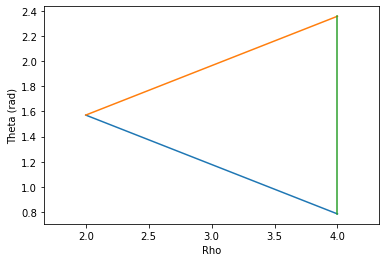

In [50]:
A = [2,0]
B = [2,2]
C = [0,2]
points = np.vstack([A,B,C])
r,c = points.shape
points = np.hstack([points, np.ones([r,1])])

lines = points2lines(points)
rhotheta = linear2hough(lines)
print('Rho and Theta(rad):')
print(np.around(rhotheta,2))

rhotheta[:,0] = rhotheta[:,0]**2
rhotheta[:,1] = rhotheta[:,1]+np.pi/4
verts2lines(rhotheta)
plt.show()

#Problem #2
(a) Draw the polygon in image space and indicate the coordinates of the four vertices.
(b) The polygon is rotated 30 degrees counterclockwise around the image space origin. Find the
Hough transform for the sides of the rotated polygon.

In [51]:
# Convert polar coordinate lines to plane normal
def polar2norm(rhotheta):
    lines = np.zeros([rhotheta.shape[0],3])
    for i in range(lines.shape[0]):
        rho = rhotheta[i,0]
        theta = rhotheta[i,1]*np.pi/180
        # Theta needs to be +/-90deg
        if theta > np.pi/2:
            theta = theta-np.pi
        if theta < -np.pi/2:
            theta = theta+np.pi

        x = rho*np.cos(theta)
        y = rho*np.sin(theta)
        slope = -1/np.tan(theta)
        intercept = y-slope*x
        if theta==0:
            line = [1,0,-x]
        elif theta==np.pi/2 or theta==-np.pi/2:
            line = [0,-1/intercept,1]
        else:
            line = [slope/intercept,-1/intercept,1]
        lines[i,:] = line
        
    return lines

In [52]:
# Find line intersections
def intersect(lines):
    corners = np.zeros([lines.shape[0],3])
    for i in np.arange(lines.shape[0]):
        if i == lines.shape[0]-1:

            corner = np.cross(lines[i,:],lines[0,:])       
        else:
            corner = np.cross(lines[i,:],lines[i+1,:])
        corners[i,:] = corner/corner[2]
    return corners

In [53]:
# Plot lines from list of linear equation Ax + By + C = 0
def plotlines(lines):
    for i in range(normlines.shape[0]):
        C0 = normlines[i,0]
        C1 = normlines[i,1]
        C2 = normlines[i,2]
        # vertical line
        start = 0
        stop = 5
        if C1 == 0.0:
            y = np.arange(start,stop)
            x = -1/C0*(C1*y + C2)
        # all other lines
        else:
            x = np.arange(start,stop)
            y = -1/C1*(C0*x + C2)
        plt.plot(x,y)
    plt.axis('equal')
    plt.show()

    return

[[3.   3.   1.  ]
 [3.   0.27 1.  ]
 [0.63 1.63 1.  ]
 [2.   3.   1.  ]]


/tmp/ipykernel_40359/3218740607.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -1/np.tan(theta)


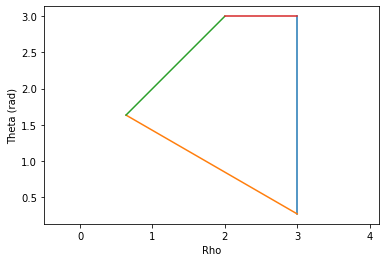

In [54]:
AB = [3,90]
BC = [3,0]
CD = [np.sqrt(3),60]
DA = [-np.sqrt(2)/2,-45]
sides = np.vstack([AB,BC,CD,DA])

normlines = polar2norm(sides)
corners = intersect(normlines)
print(np.around(corners,2))

verts2lines(corners)
plt.show()

Rotate image by 30 degrees ccw around the image space origin